# Data Exploration & Image Pre-Processing

I attempt to explore the chest X-ray database, [Chest-Xray8] (https://arxiv.org/abs/1705.02315), which comprises 108,948 frontal-view X-ray images of 32,717 unique patients with the text-mined eight disease image labels (where each image can have multi-labels), from the associated radiological reports using natural language processing.


In [1]:
# ! pip3 install pandas
# ! pip3 install numpy 
# ! pip3 install matplotlib
# ! pip3 install seaborn


In [2]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()

In [3]:
# reading the data from the CSV file 
train_df = pd.read_csv("data/nih/train-small.csv")

In [4]:
#.head() selects first five data rows
#.sample() randomizes the data rows
#.tail() selects last five data row
train_df.head()

,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


## unique ID check
 For Medical dataset, One thing you'd like to know about is  repeated data for certain patients or whether each image represents a different person. In this dataset, "PatientId" has an identification number for each patient.

In [5]:
# Look at the data type of each column and whether null values are present
train_df.info()
train_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

(1000, 16)

In [6]:
train_df['PatientId'].value_counts()

PatientId
20213    6
13003    4
13111    4
25628    3
8081     3
        ..
9326     1
4544     1
12903    1
1107     1
12363    1
Name: count, Length: 928, dtype: int64

In [7]:
print(f"The total patient ids are {train_df['PatientId'].count()}, from those the unique ids are {train_df['PatientId'].value_counts().shape[0]} ")

The total patient ids are 1000, from those the unique ids are 928 


So value_counts() is used to count the number of records for every combination of unique values for every column. Since the total patient ids are greater than the unique ids, we need to be careful about repeated values or multiple records in our training datasets


In [8]:
columns = train_df.keys()
columns = list(columns)
print(columns)

['Image', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'PatientId', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [9]:
# We're interested in the labels for these conditions so we'd have to remove some unecessary conditions
column_update = columns.remove('Image') 
column_update = columns.remove('PatientId')
print(columns)
print(column_update)
print ("number of columns: ",len(columns))


['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']
None
number of columns:  14


In [10]:
for i in columns:
    print(f"The column {i} has {train_df[i].sum()} samples")

The column Atelectasis has 106 samples
The column Cardiomegaly has 20 samples
The column Consolidation has 33 samples
The column Edema has 16 samples
The column Effusion has 128 samples
The column Emphysema has 13 samples
The column Fibrosis has 14 samples
The column Hernia has 2 samples
The column Infiltration has 175 samples
The column Mass has 45 samples
The column Nodule has 54 samples
The column Pleural_Thickening has 21 samples
The column Pneumonia has 10 samples
The column Pneumothorax has 38 samples


 Important: the dataset in the cell above is clearly an imbalance data and standard optimization criteria may not be as effective (kaggle point 1)

## Data Visualization 

In [11]:
# Extract numpy values from Image column in data frame
images = train_df['Image'].values

In [12]:
img_dir = 'data/nih/images-small/'

In [13]:
# Extract 15 random images from it
random_images = [np.random.choice(images) for i in range(15)]

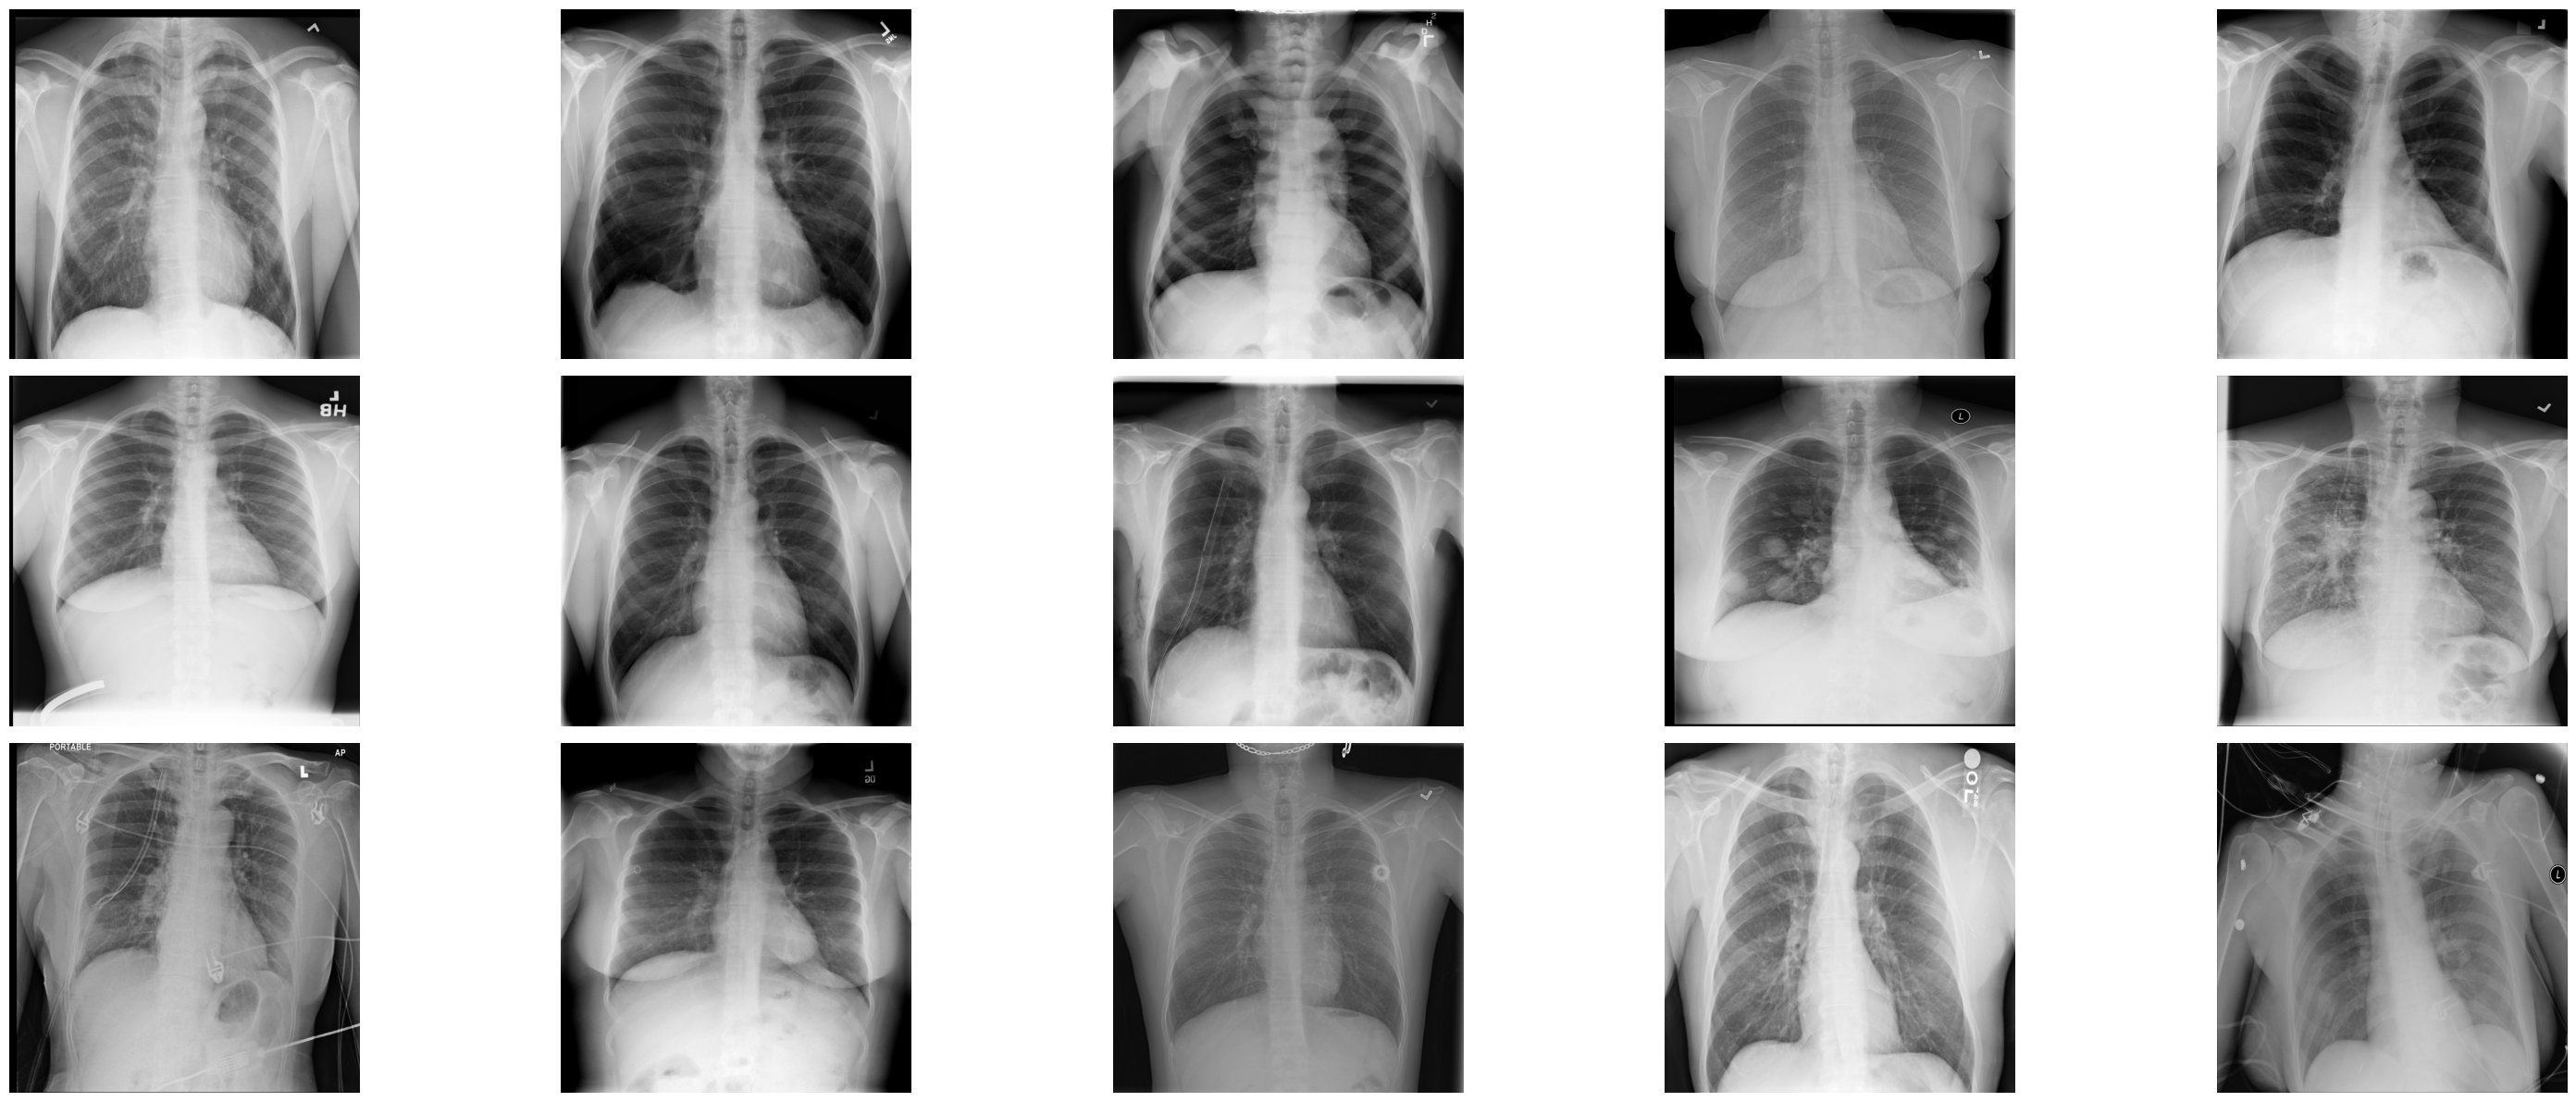

In [14]:
# Adjust the size of your images
plt.figure(figsize=(30,20))

# Iterate and plot random images
for i in range(15):
    plt.subplot(5, 5, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()    

## Investigating a single image

The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 1.00000 and the minimum is 0.00000
The mean value of the pixels is 0.5053 and the standard deviation is 0.2378


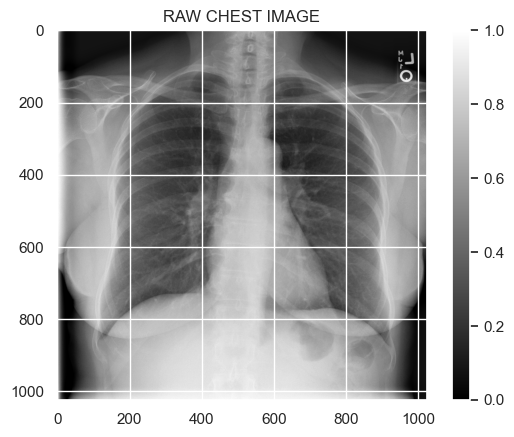

In [15]:
test_image =  train_df.Image[900]
raw_image = plt.imread(os.path.join(img_dir, test_image))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('RAW CHEST IMAGE')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.5f} and the minimum is {raw_image.min():.5f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

# Investigating Pixel value distribution

Text(-8.805555555555555, 0.5, '# Pixels in Image')

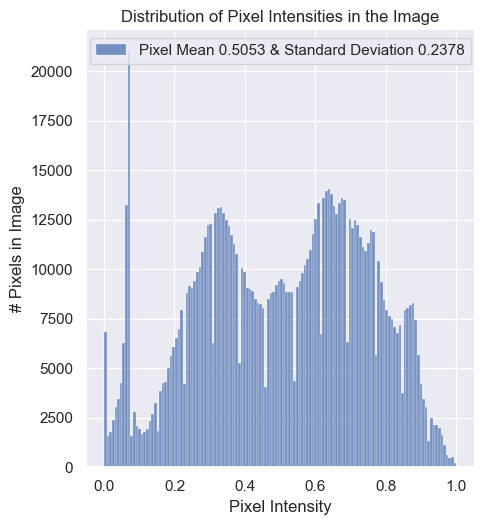

In [16]:
# Plot a histogram of the distribution of the pixels
sns.displot(raw_image.ravel(), 
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

## Keras for Image Preprocessing

To train our model, the images to be used have to be processed and modified using Keras. Here, I used the [ImageDataGenerator](https://keras.io/zh/preprocessing/image/) function from keras, it is perfect for real-time augmentation.
 



### Dealing With Tensorflow and Keras For M1
- Follow the steps here first: https://developer.apple.com/metal/tensorflow-plugin/
    - When you download the conda environment, use the location of the download for this: `$ bash [location of miniconda.sh] -b -p $HOME/miniconda`
        - e.g `bash ~/Downloads/miniconda.sh -b -p $HOME/miniconda`
        - Use `cd` to change directory and `pwd` to check which current directory you are in
    - For the setup do arm64 : Apple silicon
    - Once you finish #4 (import tensofrlow as tf), continue to next steps
- Run these commands to align the package dependencies:

```
python -m pip install matplotlib
python -m pip install seaborn   
python -m pip install pandas==2.0.0
python -m pip install tensorflow-macos==2.10.0
python -m pip install tensorflow-metal==0.6.0
python -m pip install keras==2.10.0
python -m pip install numpy==1.23
python --version (check that it is >= 3.9)
```

In [17]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
# Normalize images
image_generator = ImageDataGenerator(
    samplewise_center=True, #Set each sample mean to 0.
    samplewise_std_normalization= True # Divide each input by its standard deviation
)

### 2.1 Standardization

This `image_generator` created above will act to adjust your image data such that the new mean of the data will be zero, and the standard deviation of the data will be 1.  

In other words, the generator will replace each pixel value in the image with a new value calculated by subtracting the mean and dividing by the standard deviation.

$$\frac{x_i - \mu}{\sigma}$$

Run the next cell to pre-process your data using the `image_generator`. In this step you will also be reducing the image size down to 320x320 pixels.

In [19]:
# Flow from directory with specified batch size and target image size
generator = image_generator.flow_from_dataframe(
        dataframe=train_df,
        directory="data/nih/images-small/",
        x_col="Image", # features
        # Let's say we build a model for mass detection
        y_col= ['Mass'], # labels
        class_mode="raw", # 'Mass' column should be in train_df
        batch_size= 1, # images per batch
        shuffle= False, # shuffle the rows or not
)

Found 1000 validated image filenames.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 256 pixels width and 256 pixels height
The maximum pixel value is 1.8002 and the minimum is -1.7393
The mean value of the pixels is -0.0000 and the standard deviation is 1.0000


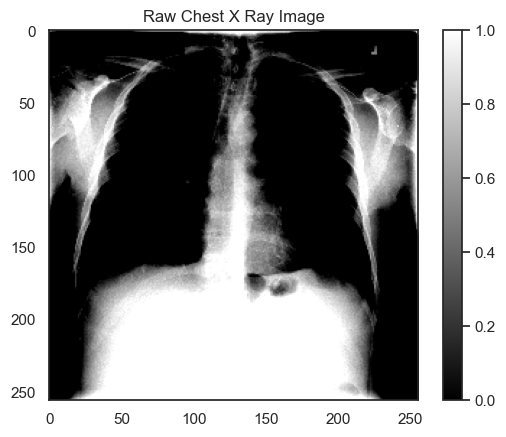

In [20]:
# Plot a processed image
sns.set_style("white")
generated_image, label = generator.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

Text(-0.30555555555555536, 0.5, '# Pixel')

<Figure size 1000x700 with 0 Axes>

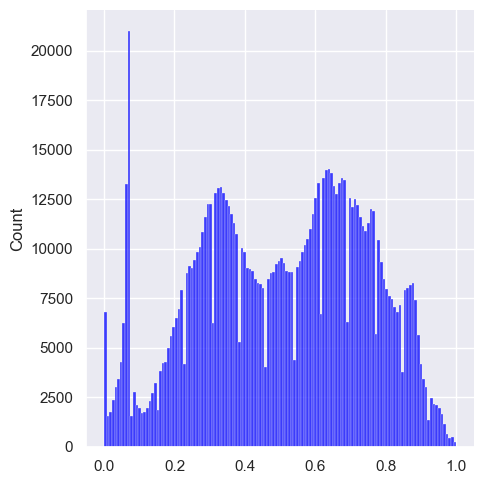

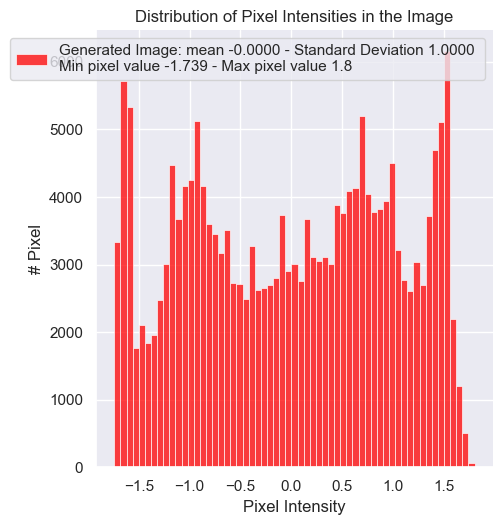

In [21]:
sns.set()
plt.figure(figsize=(10, 7))

# Plot histogram for original iamge
sns.displot(raw_image.ravel(), 
             label=f'Original Image: mean {np.mean(raw_image):.4f} - Standard Deviation {np.std(raw_image):.4f} \n '
             f'Min pixel value {np.min(raw_image):.4} - Max pixel value {np.max(raw_image):.4}',
             color='blue', 
             kde=False)

# Plot histogram for generated image
sns.displot(generated_image[0].ravel(), 
             label=f'Generated Image: mean {np.mean(generated_image[0]):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
             f'Min pixel value {np.min(generated_image[0]):.4} - Max pixel value {np.max(generated_image[0]):.4}', 
             color='red', 
             kde=False)

# Place legends
plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')

In [22]:
# Count up the number of instances of each class (drop non-class columns from the counts)
class_counts = train_df.sum().drop(['Image','PatientId'])
print(class_counts)

Atelectasis           106
Cardiomegaly           20
Consolidation          33
Edema                  16
Effusion              128
Emphysema              13
Fibrosis               14
Hernia                  2
Infiltration          175
Mass                   45
Nodule                 54
Pleural_Thickening     21
Pneumonia              10
Pneumothorax           38
dtype: object


In [23]:
for column in class_counts.keys():
    print(f"The class {column} has {train_df[column].sum()} samples")
    

The class Atelectasis has 106 samples
The class Cardiomegaly has 20 samples
The class Consolidation has 33 samples
The class Edema has 16 samples
The class Effusion has 128 samples
The class Emphysema has 13 samples
The class Fibrosis has 14 samples
The class Hernia has 2 samples
The class Infiltration has 175 samples
The class Mass has 45 samples
The class Nodule has 54 samples
The class Pleural_Thickening has 21 samples
The class Pneumonia has 10 samples
The class Pneumothorax has 38 samples


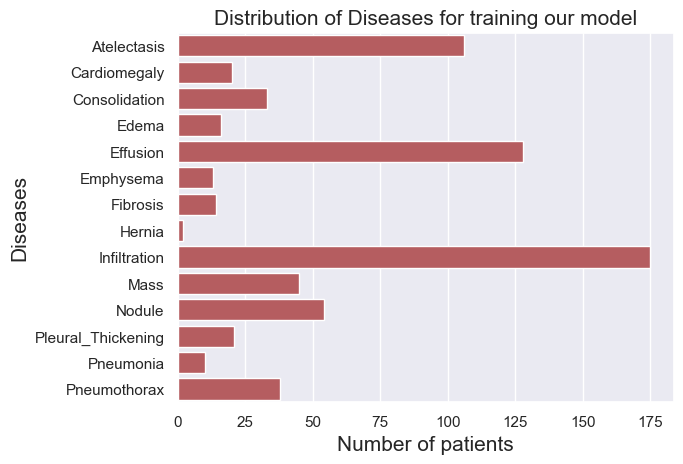

In [24]:
#Plotting the distribution of counts
sns.barplot(x=class_counts.values, y=class_counts.index, color='r')
plt.title('Distribution of Diseases for training our model', fontsize=15)
plt.xlabel('Number of patients', fontsize=15)
plt.ylabel('Diseases', fontsize=15)  
plt.show()


#### Now that the dataset class imbalance has been illustrated here, the next section would slowly introduce weighted loss function  to address this problem

In [25]:
# Understaning Weight loss function 
# Generate an array of 4 binary label values, 3 positive and 1 negative
y_true = np.array(
        [[1],
         [1],
         [1],
         [0]])
print(f"y_true: \n{y_true}") 

y_true: 
[[1]
 [1]
 [1]
 [0]]


In [26]:
# Make model predictions that are always 0.9 for all examples
y_pred_1 = 0.9 * np.ones(y_true.shape)
print(f"y_pred_1: \n{y_pred_1}")  
print()
y_pred_2 = 0.1 * np.ones(y_true.shape)
print(f"y_pred_2: \n{y_pred_2}") 

y_pred_1: 
[[0.9]
 [0.9]
 [0.9]
 [0.9]]

y_pred_2: 
[[0.1]
 [0.1]
 [0.1]
 [0.1]]


###  Basic Loss Funtion
![Loss function](Loss_function.png)
![lossfunction](lossfunction2.png)


In [27]:
loss_reg_1 = -1 * np.sum(y_true * np.log(y_pred_1)) + \
                -1 * np.sum((1 - y_true) * np.log(1 - y_pred_1))
print(f"loss_reg_1: {loss_reg_1:.3f}")

loss_reg_1: 2.619


In [28]:
loss_reg_2 = -1 * np.sum(y_true * np.log(y_pred_2)) + \
                -1 * np.sum((1 - y_true) * np.log(1 - y_pred_2))
print(f"loss_reg_2: {loss_reg_2:.3f}")

loss_reg_2: 7.013


In [29]:
print(f"When the model 1 always predicts 0.9, the regular loss is {loss_reg_1:.4f}")
print(f"When the model 2 always predicts 0.1, the regular loss is {loss_reg_2:.4f}")

When the model 1 always predicts 0.9, the regular loss is 2.6187
When the model 2 always predicts 0.1, the regular loss is 7.0131


#### Weighted Loss function 

$$ loss^{(i)} = loss_{pos}^{(i)} + los_{neg}^{(i)} $$

$$loss_{pos}^{(i)} = -1 \times weight_{pos}^{(i)} \times y^{(i)} \times log(\hat{y}^{(i)})$$

$$loss_{neg}^{(i)} = -1 \times weight_{neg}^{(i)} \times (1- y^{(i)}) \times log(1 - \hat{y}^{(i)})$$

In [30]:
# Computing the weights for the  array of 4 binary label values, 3 positive and 1 negative
# calculate the positive weight as the fraction of negative labels
w_p = 1/4

# calculate the negative weight as the fraction of positive labels
w_n = 3/4


In [31]:
loss_weigh_1 = -1 * np.sum( w_p * y_true * np.log(y_pred_1)) + \
                -1 * np.sum( w_n * (1 - y_true) * np.log(1 - y_pred_1))
print(f"loss_weigh_1: {loss_weigh_1:.3f}")

loss_weigh_1: 1.806


In [32]:
loss_weigh_2 = -1 * np.sum(y_true * np.log(y_pred_2)) + \
                -1 * np.sum((1 - y_true) * np.log(1 - y_pred_2))
print(f"loss_reg_2: {loss_reg_2:.3f}")

loss_reg_2: 7.013
